# Hello everyone!

**Team Members**

* Zeyad Abdelwahab
* Maryam Mohamed Afifi
* Mayada Magdy Amin
* Aly Osama Othman
* Omar Hegazy Hegazy
* Mohaned Gamal Hussin

# 1. Import Libraries and Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency, ttest_ind
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\cleaned_data.csv")
df.head()

Name       Age  Gender  Blood Type  Medical Condition  \
0  Bobby JacksOn  0.223684       1           5                  2   
1   LesLie TErRy  0.644737       1           0                  5   
2    DaNnY sMitH  0.828947       0           1                  5   
3   andrEw waTtS  0.197368       0           6                  3   
4  adrIENNE bEll  0.394737       0           2                  2   

  Date of Admission            Doctor                    Hospital  \
0        2024-01-31     Matthew Smith             Sons and Miller   
1        2019-08-20   Samantha Davies                     Kim Inc   
2        2022-09-22  Tiffany Mitchell                    Cook PLC   
3        2020-11-18       Kevin Wells  Hernandez Rogers and Vang,   
4        2022-09-19    Kathleen Hanna                 White-White   

  Insurance Provider  Billing Amount  Room Number  Admission Type  \
0         Blue Cross        0.380933          328               2   
1           Medicare        0.650904          265               1   
2              Aetna        0.547053          205               1   
3           Medicare        0.728798          450               0   
4              Aetna        0.296622          458               2   

  Discharge Date  Medication  Test Results  Test Results Encoded  
0     2024-02-02           3             2                     0  
1     2019-08-26           1             1                     2  
2     2022-10-07           0             2                     0  
3     2020-12-18           1             0                     1  
4     2022-10-09           4             0                     1

# 2. Data Cleaning

In [4]:
numeric_cols = ['Age', 'Billing Amount']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

power_transformer = PowerTransformer()
df[numeric_cols] = power_transformer.fit_transform(df[numeric_cols])

**addressing outliers**

In [5]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers per column (IQR method):\n", outliers_iqr)


Outliers per column (IQR method):
 Age               0
Billing Amount    0
dtype: int64


**Identifying and Fixing Unexpected Values**

In [6]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]

In [7]:
if 'test_result_encoded' not in df.columns:
    le = LabelEncoder()
    df['test_result_encoded'] = le.fit_transform(df['Test Results'])

In [8]:
# Convert 'Date of Admission' to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Extract the year-month as a proper datetime object
df['Month'] = df['Date of Admission'].dt.to_period('M').astype(str)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Group by Month and count admissions
monthly_admissions = df.groupby('Month').size().reset_index(name='Admissions')

# Sort by date (just in case)
monthly_admissions = monthly_admissions.sort_values(by='Month')

# 3. Data Analysis

**Correlation Analysis**

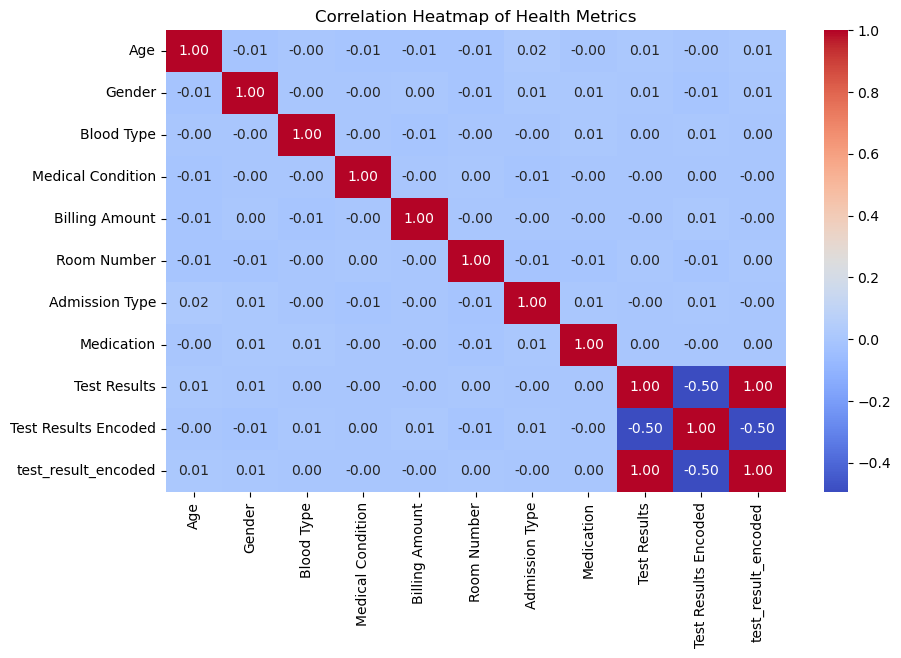

In [9]:
# Convert categorical columns to numeric for correlation analysis
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Health Metrics")
plt.show()

**Hypothesis Testing**

In [10]:
# Group by Medical Condition and compare billing amounts
group1 = df[df['Medical Condition'] == 'diabetes']['Billing Amount']
group2 = df[df['Medical Condition'] == 'cancer']['Billing Amount']

# Perform t-test
stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-Test Results: p-value = {p_value}")
if p_value < 0.05:
    print("ðŸ”´ Significant difference found between the groups!")
else:
    print("âœ… No significant difference.")


T-Test Results: p-value = nan
âœ… No significant difference.


In [11]:

# Create contingency table for Blood Type vs Medical Condition
contingency_table = pd.crosstab(df['Blood Type'], df['Medical Condition'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("ðŸ”¹ Blood Type has a significant effect on Medical Condition.")
else:
    print("ðŸ”¹ No strong evidence that Blood Type affects Medical Condition.")


Chi-Square Statistic: 30.98106361060314
P-Value: 0.6625766732530531
ðŸ”¹ No strong evidence that Blood Type affects Medical Condition.


In [12]:
# Grouped analysis by Test Result
grouped = df.groupby('Test Results').mean(numeric_only=True)
display(grouped)

Age    Gender  Blood Type  Medical Condition  \
Test Results                                                      
0             0.854213  0.499038    3.475748           2.496688   
1             0.861880  0.496614    3.512560           2.499345   
2             0.866425  0.505829    3.481082           2.496150   

              Billing Amount  Room Number  Admission Type  Medication  \
Test Results                                                            
0                  -0.001111   301.655983        0.994551    1.985897   
1                   0.017301   300.071756        1.006116    1.985474   
2                  -0.012885   302.975143        0.992301    1.987352   

              Test Results Encoded  test_result_encoded  
Test Results                                             
0                              1.0                  0.0  
1                              2.0                  1.0  
2                              0.0                  2.0

# 4. Data Visualization

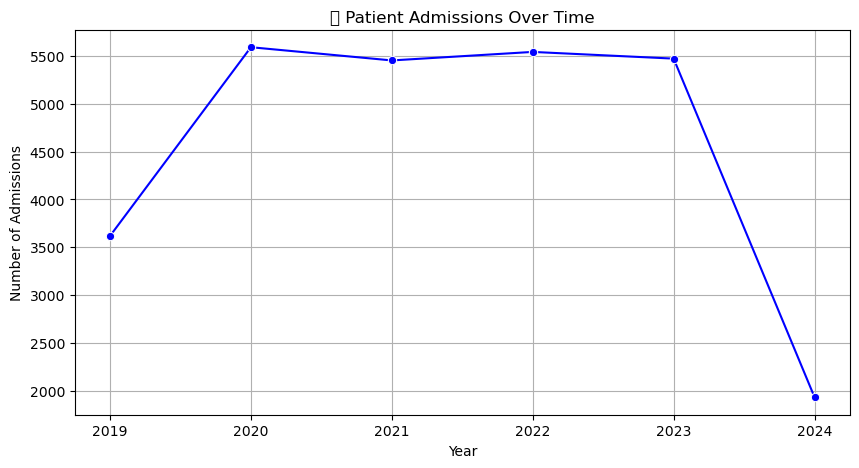

In [15]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])  # Convert to datetime
df_trend = df.groupby(df['Date of Admission'].dt.year)['Name'].count()  # Count admissions per year

# Plot trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_trend.index, y=df_trend.values, marker="o", color="blue")
plt.title("ðŸ“ˆ Patient Admissions Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Admissions")
plt.grid(True)
plt.show()


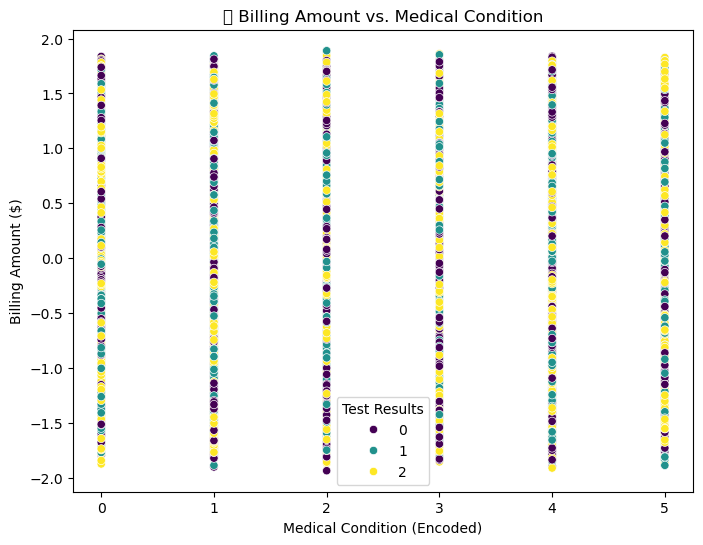

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Medical Condition", y="Billing Amount", hue="Test Results", palette="viridis")
plt.title("ðŸ’° Billing Amount vs. Medical Condition")
plt.xlabel("Medical Condition (Encoded)")
plt.ylabel("Billing Amount ($)")
plt.show()

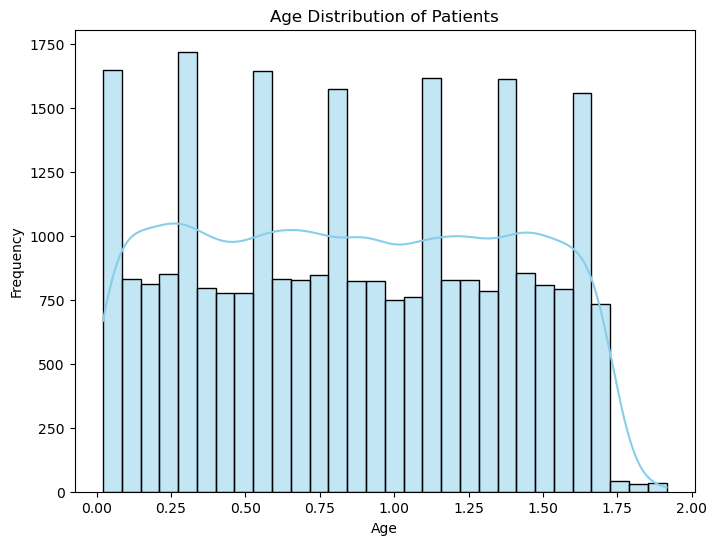

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [18]:
print(df['Age'].unique())  # Check unique values in the Age column
print(df['Age'].describe())  # See min, max, mean, etc.

[0.53240568 1.24902274 1.55656455 0.32797075 1.04412343 1.19778776
 0.83933885 0.58353907 0.78816206 0.37906399 1.09533795 1.35151209
 0.94171607 0.27688849 1.14655944 1.50529254 0.68583323 1.30026423
 1.65912568 0.17475868 1.6078423  0.48128182 1.45402637 0.4301678
 1.40276618 0.0726785  0.89052359 1.71041457 0.02165847 0.12371211
 0.73699343 0.22581764 0.63468168 0.99291608 1.86431334 1.8130085
 1.76170888 1.9156233 ]
count    27608.000000
mean         0.860777
std          0.504067
min          0.021658
25%          0.430168
50%          0.839339
75%          1.300264
max          1.915623
Name: Age, dtype: float64


In [19]:
print(df['Gender'].value_counts())


Gender
1    13817
0    13791
Name: count, dtype: int64


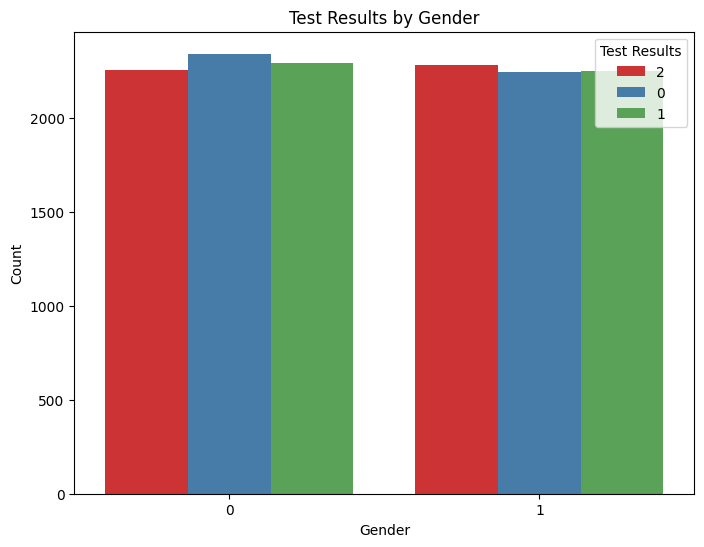

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Gender', hue='Test Results', palette='Set1')
plt.title('Test Results by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Test Results')
plt.show()


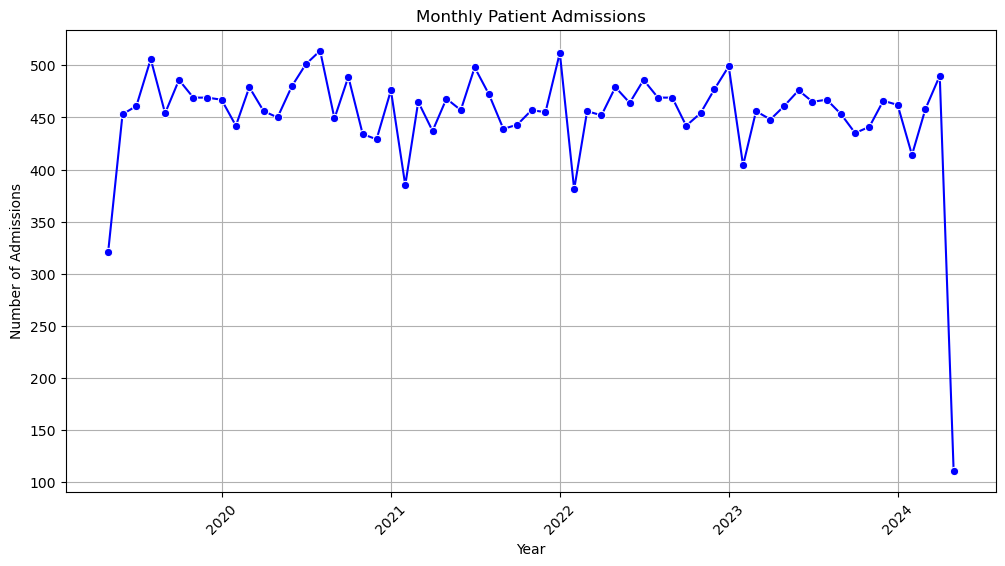

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_admissions, x='Month', y='Admissions', marker='o', color='blue')

# Formatting
plt.title('Monthly Patient Admissions')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)  # Rotate for readability
plt.grid(True)

# Show Plot
plt.show()

In [21]:
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Scatter Plot with Trendline
fig = px.scatter(df, x='Age', y='Billing Amount', trendline='ols', title='Age vs Billing Amount Trend')
fig.show()

# Interactive Heatmap (only numeric columns)
fig = go.Figure(data=go.Heatmap(z=df_numeric.corr().values,
                                x=df_numeric.columns,
                                y=df_numeric.columns,
                                colorscale='RdBu'))
fig.update_layout(title='Interactive Correlation Heatmap')
fig.show()